In [1]:
# !pip install scikit-video

In [1]:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from IPython import display
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import skvideo.io
import xml.etree.ElementTree as ET

/home/imam.rahman/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Read Video w/ Open CV

In [2]:
# vidcap = skvideo.io.vreader("vid_raw/rem.mp4")
# frames = list()
# for i,f in enumerate(vidcap):
#     if i == 0 or i%10 == 0:
#         plt.imsave("./data_raw/train/frame_{}.png".format(i), f, format='png')

In [3]:
# vidcap = skvideo.io.vreader("vid_raw/rem_test.mp4")
# frames = list()
# for i,f in enumerate(vidcap):
#     if i == 0 or i%10 == 0:
#         plt.imsave("./data_raw/test/frame_{}.png".format(i), f, format='png')

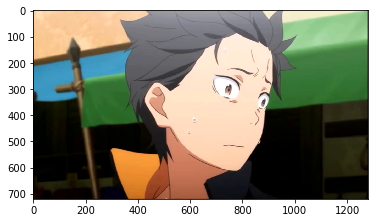

In [4]:
vidcap = skvideo.io.vreader("vid_raw/rem.mp4")
frame = vidcap.next()
plt.imshow(frame)

# Next Step

You need to mark + labeling your picture using labelImg, one by one :)

# Read Labeled Data in Xml

In [5]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

In [6]:
def xml_to_dict(xml_path):
    def _extract_elem(elem):
        if list(elem):
            return {c.tag:_extract_elem(c) for c in list(elem)}
        return elem.text
        
    tree = ET.parse(xml_path)
    root = tree.getroot()
    return {c.tag:_extract_elem(c) for c in list(root)}

In [74]:
xml_to_dict("./train/xml_label/frame_5150.xml")

{'filename': 'frame_5150.png',
 'folder': 'images',
 'object': {'bndbox': {'xmax': '1002',
   'xmin': '604',
   'ymax': '425',
   'ymin': '40'},
  'difficult': '0',
  'name': 'REM',
  'pose': 'Unspecified',
  'truncated': '0'},
 'path': '/home/imam.rahman/Work/jupyter notebook/Tensor Flow/Object Detection/images/frame_5150.png',
 'segmented': '0',
 'size': {'depth': '3', 'height': '720', 'width': '1280'},
 'source': {'database': 'Unknown'}}

In [75]:
def create_pandas_from_path(path):
    walk = os.walk(path)
    files = sorted(walk.next()[2])
    df = list()
    for f in files:
        dat = xml_to_dict(path + f)
        df.append(dat)
    
    df = pd.DataFrame(df)
    df["width"] = df["size"].apply(lambda x: x.get("width"))
    df["height"] = df["size"].apply(lambda x: x.get("height"))
    df["class"] = df["object"].apply(lambda x: x.get("name"))
    df["xmin"] = df["object"].apply(lambda x: x.get("bndbox").get("xmin"))
    df["ymin"] = df["object"].apply(lambda x: x.get("bndbox").get("ymin"))
    df["xmax"] = df["object"].apply(lambda x: x.get("bndbox").get("xmax"))
    df["ymax"] = df["object"].apply(lambda x: x.get("bndbox").get("ymax"))
    df = df[["filename","width","height","class","xmin","ymin","xmax","ymax"]]
    return df

In [77]:
path = "./train/xml_label/"
df = create_pandas_from_path(path)
df.to_csv("train/train.csv", index=False, encoding="utf-8")
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,frame_1060.png,1280,720,REM,573,100,973,514
1,frame_1080.png,1280,720,REM,564,31,992,478
2,frame_110.png,1280,720,REM,485,1,1171,514
3,frame_1100.png,1280,720,REM,592,43,985,466
4,frame_1120.png,1280,720,REM,574,38,973,457


In [85]:
path = "./test/xml_label/"
df = create_pandas_from_path(path)
df.to_csv("test/test.csv", index=False, encoding="utf-8")
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,frame_2450.png,1280,720,REM,649,4,1092,423
1,frame_2480.png,1280,720,REM,645,2,1107,433
2,frame_2950.png,1280,720,REM,521,1,912,338
3,frame_3130.png,1280,720,REM,72,1,985,681
4,frame_3180.png,1280,720,REM,65,1,1028,671


# Create TF Record

In [84]:
!sh generate_tfrecord.sh

GLib-GIO-Message: Using the 'memory' GSettings backend.  Your settings will not be saved or shared with other applications.
/home/imam.rahman/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Successfully created the TFRecords: /home/imam.rahman/Work/jupyter notebook/Tensor Flow/Object Detection/data/train.record
GLib-GIO-Message: Using the 'memory' GSettings backend.  Your settings will not be saved or shared with other applications.
/home/imam.rahman/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _registe